In [1]:
import refnx.dataset, refnx.reflect
import matplotlib.pyplot as plt
import toolbox as tb
import models.two_layer as tl

In [2]:
a = refnx.dataset.ReflectDataset('data/ml_22/XRR_293364_3c.dat')
b = refnx.dataset.ReflectDataset('data/ml_12/XRR_293049_3c.dat')
c = refnx.dataset.ReflectDataset('data/ml_33/XRR_293849_3c.dat')

In [21]:
head = {"C": 10, "H": 18, "O": 8, "N": 1, "P": 1}
tail = {"C": 15 * 2, "H": 15 * 4 + 2}

b_head = tb.get_scattering_length(head, 12.5)
b_tail = tb.get_scattering_length(tail, 12.5)

lipids = tl.TwoLayer([b_head, b_tail], name='sample{}'.format(1))

air = refnx.reflect.SLD(0, "air")
water = refnx.reflect.SLD(9.45, "h2o")
structures = air(0, 0) | lipids | water(0, 3.3)

lipids.thick_t.setp(17, vary=False, bounds=(16.8, 22))
lipids.thick_h.setp(10., vary=True, bounds=(5.5, 12.5))
lipids.mol_vol_h.setp(319, vary=False)
lipids.mol_vol_t.setp(829, vary=False)
structures[-1].rough.setp(3.3, vary=True, bounds=(2.9, 6))
lipids.rough_h_t.constraint = structures[-1].rough
lipids.rough_t_a.constraint = structures[-1].rough
lipids.phi_t.setp(0, vary=True, bounds=(0., 0.5))
lipids.phi_h.setp(0.5, vary=True, bounds=(0.1, 0.9))

lipids.solv_sld.constrain = structures[-1].sld.real

models = refnx.reflect.ReflectModel(structures)

models.bkg.setp(b.y.min(), vary=True, bounds=(1e-12, 1e-8))
models.scale.setp(1, vary=False)

o = refnx.analysis.Objective(models, c)

In [22]:
fitter = refnx.analysis.CurveFitter(o)
fitter.fit('differential_evolution', seed=1)

35it [00:15,  2.22it/s]


   covar: array([[ 5.73702126e-20,  1.16853616e-12, -7.68541251e-14,
        -5.50162949e-14,  8.14203599e-13],
       [ 1.16853616e-12,  1.53458488e-03,  2.66344863e-05,
        -1.04210815e-05, -2.45652205e-05],
       [-7.68541251e-14,  2.66344863e-05,  1.68661740e-05,
         6.50865652e-06, -2.02051070e-05],
       [-5.50162949e-14, -1.04210815e-05,  6.50865652e-06,
         5.08857996e-06, -1.11668897e-05],
       [ 8.14203599e-13, -2.45652205e-05, -2.02051070e-05,
        -1.11668897e-05,  1.05081799e-04]])
     fun: 478.6339477340617
     jac: array([ 1.13509554e+11, -5.79183279e-01,  1.00630700e+01,  4.81494675e+03,
        8.85864893e+00])
 message: 'Optimization terminated successfully.'
    nfev: 2850
     nit: 35
  stderr: array([2.39520798e-10, 3.91737780e-02, 4.10684477e-03, 2.25578810e-03,
       1.02509414e-02])
 success: True
       x: array([1.00000000e-12, 8.63211798e+00, 4.52318223e-01, 6.72711835e-05,
       3.38422456e+00])

Text(0, 0.5, '$Rq^4$/Å$^{-4}$')

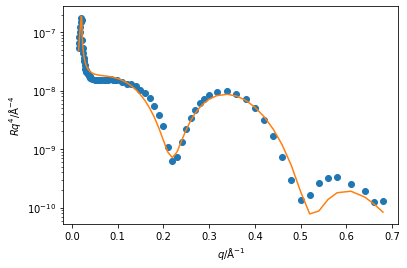

In [23]:
plt.plot(c.x, c.y * c.x ** 4, 'o')
plt.plot(c.x, models(c.x) * c.x ** 4)
plt.yscale('log')
plt.xlabel('$q$/Å$^{-1}$')
plt.ylabel('$Rq^4$/Å$^{-4}$')

In [24]:
q = refnx.analysis.Objective(models, b)

In [25]:
fitter = refnx.analysis.CurveFitter(q)
fitter.fit('differential_evolution', seed=1)

31it [00:15,  2.00it/s]


   covar: array([[ 9.78927684e-21,  6.78884784e-13, -1.84239792e-14,
        -2.26970972e-14,  2.42674867e-13],
       [ 6.78884784e-13,  2.22728027e-03,  1.70696140e-05,
        -2.30868580e-05,  2.86034309e-05],
       [-1.84239792e-14,  1.70696140e-05,  1.18318813e-05,
         4.30411446e-06, -1.22688547e-05],
       [-2.26970972e-14, -2.30868580e-05,  4.30411446e-06,
         3.51541786e-06, -8.14893631e-06],
       [ 2.42674867e-13,  2.86034309e-05, -1.22688547e-05,
        -8.14893631e-06,  7.31425302e-05]])
     fun: -236.50844380558746
 message: 'Optimization terminated successfully.'
    nfev: 2682
     nit: 31
  stderr: array([9.89407744e-11, 4.71940703e-02, 3.43975018e-03, 1.87494476e-03,
       8.55234063e-03])
 success: True
       x: array([3.52295425e-10, 8.78252759e+00, 5.78838787e-01, 4.84865871e-02,
       4.05487792e+00])

In [ ]:
plt.plot(b.x, b.y * b.x ** 4, 'o')
plt.plot(b.x, models(b.x) * b.x ** 4)
plt.yscale('log')
plt.xlabel('$q$/Å$^{-1}$')
plt.ylabel('$Rq^4$/Å$^{-4}$')

Text(0, 0.5, '$Rq^4$/Å$^{-4}$')